In [24]:
import os
import glob
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
#Carga de datos
def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df 
load_data().head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
output_directory = "../docs"
def create_output_directory():
    if os.path.exists(output_directory):
        files = glob.glob(f"{output_directory}/*")
        for file in files:
            os.remove(file)
        os.rmdir(output_directory)
    os.makedirs("../docs")
create_output_directory()

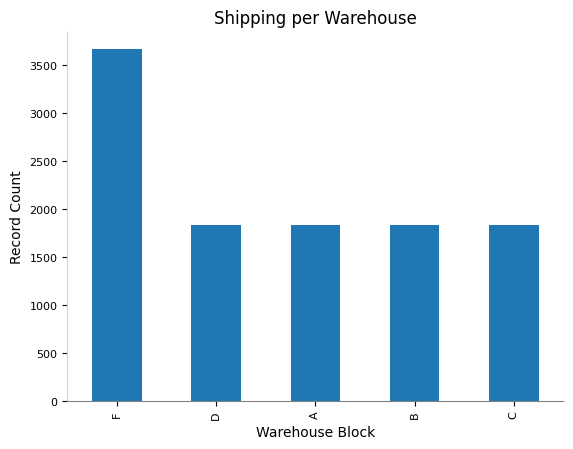

In [ ]:
#Grafico de los envios por bodega
def create_visual_for_shipping_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel= "Warehouse Block",
        ylabel= "Record Count",
        color= "tab:blue",
        fontsize= 8,
    )
    
    
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["left"].set_color("lightgrey")
    plt.gca().spines["bottom"].set_color("gray")
    plt.savefig("../docs/shipping_per_warehouse.png")

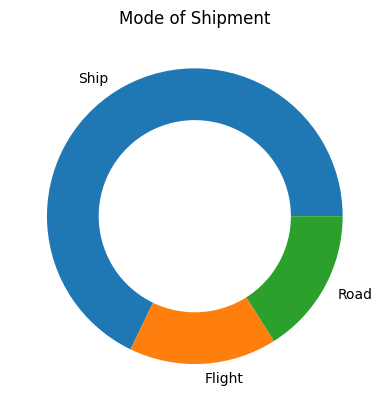

In [ ]:
#Grafico redondo
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of Shipment",
        wedgeprops= dict(width=0.35),
        ylabel= "",
        colors={"tab:blue", "tab:orange", "tab:green"}
    )
    
    plt.savefig("../docs/mode_of_shipment.png")

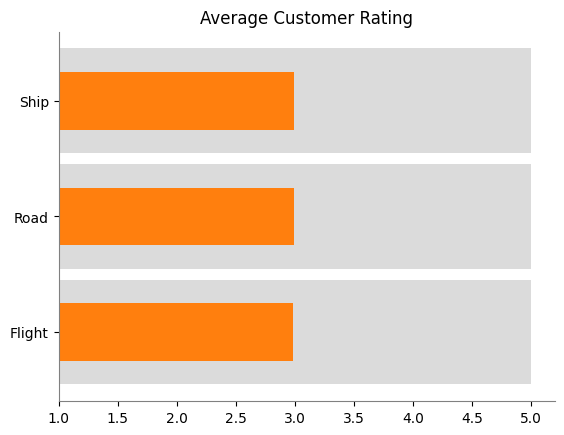

In [ ]:
#Grafico del promedio de la calificacion de los usuarios por medio de envio
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y= df.index.values,
        width= df["max"].values -1,
        left= df["min"].values,
        height= 0.9,
        color= "lightgray",
        alpha= 0.8,
)
    colors = {
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    }
    plt.barh(
        y= df.index.values,
        width= df["mean"].values -1,
        left= df["min"].values,
        height= 0.5,
        color= colors,
        alpha= 1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.savefig("../docs/average_customer_rating.png")

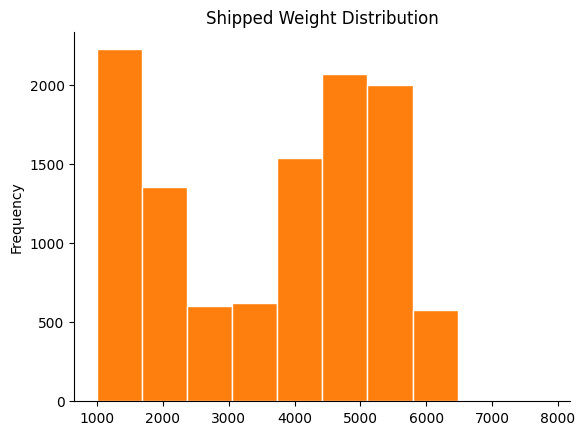

In [ ]:
#Distribucion por peso
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title= "Shipped Weight Distribution",
        color= "tab:orange",
        edgecolor= "white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("../docs/weight_distribution.png")

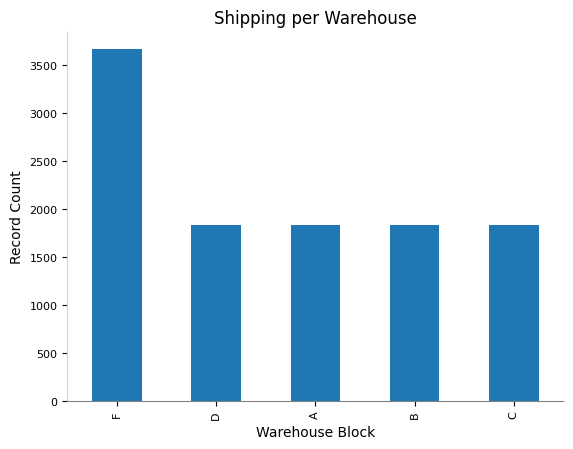

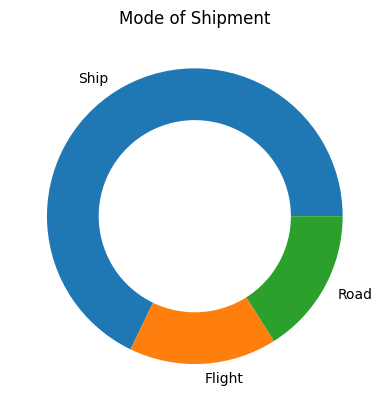

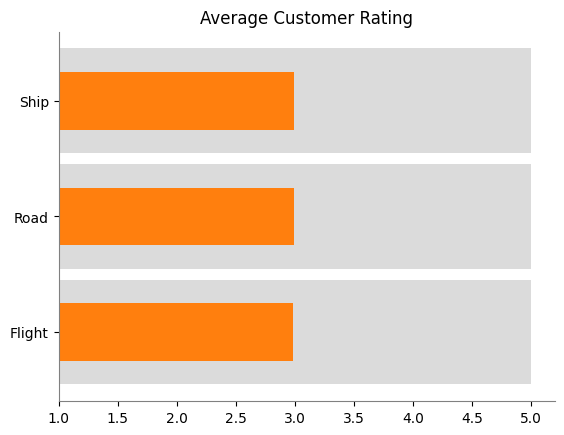

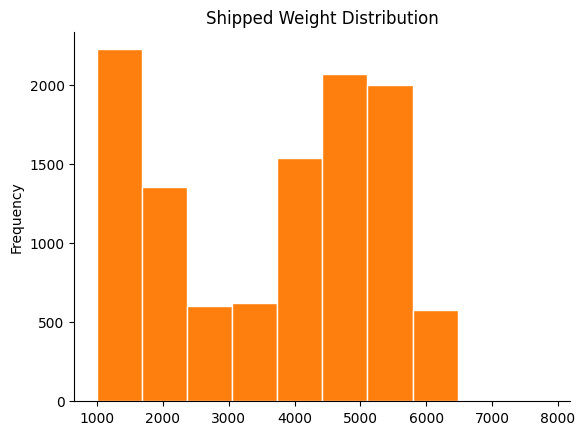

In [31]:
df = load_data()
create_output_directory()
create_visual_for_shipping_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)

In [32]:
%%writefile index.html
<!DOCTYPE html>
<html>
    <body>
    <h1>Shipping Dashboard Example</h1>
    <div style="width:45%;float:left">
        <img src="../docs/shipping_per_warehouse.png", alt="Fig 1">
        <img src="../docs/mode_of_shipment.png", alt="Fig 2">
    </div>
    <div style="width:45%;float:left">
        <img src="../docs/average_customer_rating.png", alt="Fig 3">
        <img src="../docs/weight_distribution.png", alt="Fig 4">
    </div>
    </body>
</html>
    

Writing index.html
